<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE32338](https://jckantor.github.io/CBE32338)
by Jeffrey Kantor (jeff at nd.edu); the content is available [on Github](https://github.com/jckantor/CBE2338.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Lab Assignment: PID Control](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/04.10-Lab-Assignment-PID-Control.ipynb) | [Contents](toc.ipynb) | [Predictive Control and Real Time Optimization](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/05.00-Predictive-Control-and-Real-Time-Optimization.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE32338/blob/master/notebooks/04.11-Lab-Assignment-PI-Control.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/CBE32338/master/notebooks/04.11-Lab-Assignment-PI-Control.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# Lab Assignment 4: PI Control

This lab assignment introduces the use of PID control for the temperature control laboratory. In this assignment you will be 

* testing a simple implementation of PI control
* identifying issues that have to be addressed for a more practical implementation

## Implementation of a simple PI controller

Given a process variable $PV$ and setpoint $SP$, proportional-integral-derivative control determines the value of a manipulated variable MV by the equation

\begin{align}
MV & = \bar{MV} + k_p\left(SP - PV\right) + k_i \int_0^t \left(SP-PV)\right)dt
\end{align}

where $k_p$ and $k_i$ are the proportional and integral coefficients, respectively. The value $\bar{MV}$ is a nominal or initial value of the manipulated variable.

The actual implementation of PI control is normally done by computing how much the $MV$ should change at each time step. Defining the error at time $k$ as

\begin{align}
e_k & = SP_k - PV_k
\end{align}

then consecutive values of $MV$ are given by 

\begin{align}
MV_{k-1} & = \bar{MV} + k_p e_{k-1} + k_i \sum_{j=0}^{k-1} e_{j} \\
MV_{k} & = \bar{MV} + k_p e_{k} + k_i \sum_{j=0}^{k} e_{j}
\end{align}

Taking differences gives a practical formula for updating the value of $MV$ in response to measurements

\begin{align}
MV_{k} & = MV_{k-1} + k_p(e_{k} - e_{k-1}) + k_i e_{k}
\end{align}

The following code defines a Python object that implements this algorithm.

In [21]:
class PI:
    def __init__(self, kp=1, ki=0, MV=0):
        self.kp = kp
        self.ki = ki
        self.e_prev = 0
        self.MV = MV

    def update(self, SP, PV):
        e = SP - PV
        self.e = e
        self.MV += self.kp * (e - self.e_prev) + self.ki * e
        self.MV = max(0, min(100, self.MV))
        self.e_prev = e
        return self.MV

## Exercise 1. Tune the PI control for the Temperature Control Lab

The following cell provides an initial implementation of PI control for heater T1.  This is setup for testing with the off-line simulation mode of tclab.  Experiment with the simulation to find appropriate values for $k_p$ and $k_i$. Your design goal is to achieve the setpoint and stay within a zone of +/- 2 degrees as quickly as possible.

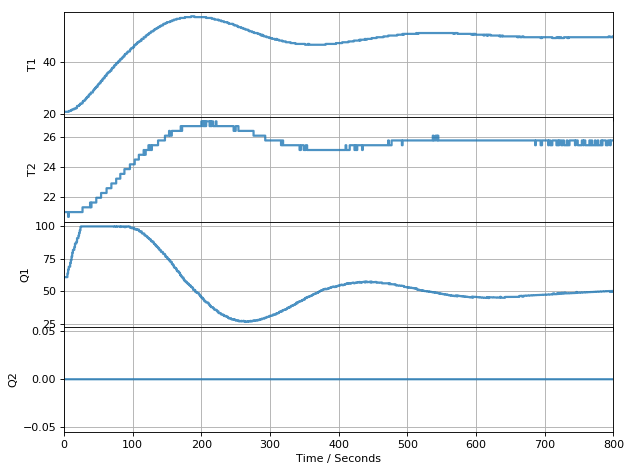

TCLab Model disconnected successfully.


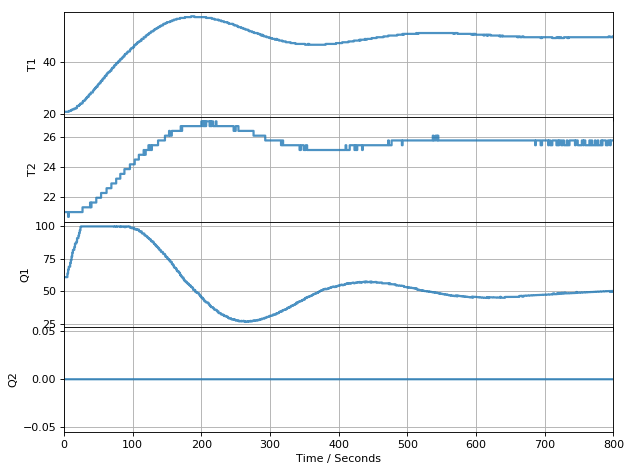

In [22]:
%matplotlib inline
from tclab import setup, clock, Historian, Plotter

TCLab = setup(connected=False, speedup = 20)

pi = PI(kp=2, ki=0.1)
SP = 50

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, 800)
    for t in clock(800):
        PV = lab.T1               # measure the the process variable
        MV = pi.update(SP, PV)    # PI control to determine the MV
        lab.Q1(MV)                # set the heater power
        p.update(t)               # log data

## Exercise 2. Hardware testing the PI controller

* Copy and paste the above code into the cell below. Connect the code to the tclab hardware by changing 'connected' to 'True'.  Adjust the experiment horizon to 1200 seconds to provide plenty of time for testing.

* Test your controller.  Does the performance match the simulation?

* After the controller has achieved the setpoint, introduce a disturbance. An example of a disturbance would be to increase air flow around the device, or to touch the heater with something thermally conductive (be careful, don't use your finger. 50 deg C is hot enough to burn your skin.) 

* Add a text cell below, and comment on your results. Do you see any shortcomings in this control implementation?

In [23]:
# put your code here

Write your comments in this cell.



## Exercise 3. Multivariable PI control

The next exercise is to extend the system to control both heaters. You won't have enough time in the lab to do this experimentally, so do this exercise using the simulation mode of tclab.

* Copy and past the code from Exercise 1 into the cell below.  

* Add a second PI controller (rename the first pi_1, and call the second pi_2, for example). Adjust the setpoint for the first heater to 40 deg C, and the second to 35 deg C. Tune the controllers to achieve rapid acquisition of the setpoints.

In [24]:
# put your code here

<!--NAVIGATION-->
< [Lab Assignment: PID Control](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/04.10-Lab-Assignment-PID-Control.ipynb) | [Contents](toc.ipynb) | [Predictive Control and Real Time Optimization](http://nbviewer.jupyter.org/github/jckantor/CBE32338/blob/master/notebooks/05.00-Predictive-Control-and-Real-Time-Optimization.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE32338/blob/master/notebooks/04.11-Lab-Assignment-PI-Control.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/CBE32338/master/notebooks/04.11-Lab-Assignment-PI-Control.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>